**Data Cleaning for Table 1:** International Migrant Stock at mid-year by sex and major location, 1990-2015

In [ ]:
#read excel file from google drive 
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import pandas as pd
import plotly.express as px
import numpy as np

In [ ]:
#Create dataframe and load table 1
#Skip rows that makeup header because it is not necessary information

df = pd.read_excel(r'/content/gdrive/My Drive/UN_MigrantStockTotal_2015.xlsx',
                       sheet_name='Table 1',
                   skiprows=14) 

In [ ]:
df.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock at mid-year (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028


In [ ]:
#Dropping unnecessary columns in dataframe 

to_drop = ['Notes',
           'Country code',
           'Type of data (a)',
           'Sort\norder']  

df.drop(to_drop, inplace=True, axis=1)

In [ ]:
#Renaming 'nan' values to temporary column

df.columns = df.columns = ['Location', 'BothSexes1990', 'BothSexes1995', 
                   'BothSexes2000', 'BothSexes2005', 'BothSexes2010',
                   'BothSexes2015','Male1990', 'Male1995', 'Male2000', 'Male2005', 
                   'Male2010', 'Male2015','Female1990', 'Female1995','Female2000', 
                   'Female2005', 'Female2010', 'Female2015']

In [ ]:
#Remove first row now that we have temporarily changed column names 
df = df.iloc[1:]
df

,Location,BothSexes1990,BothSexes1995,BothSexes2000,BothSexes2005,BothSexes2010,BothSexes2015,Male1990,Male1995,Male2000,Male2005,Male2010,Male2015,Female1990,Female1995,Female2000,Female2005,Female2010,Female2015
1,WORLD,152563212,160801752,172703309,191269100,221714243,243700236,77747510,81737477,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,Developed regions,82378628,92306854,103375363,117181109,132560325,140481955,40263397,45092799,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,Developing regions,70184584,68494898,69327946,74087991,89153918,103218281,37484113,36644678,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,Least developed countries,11075966,11711703,10077824,9809634,10018128,11951316,5843107,6142712,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
5,Less developed regions excluding least develop...,59105261,56778501,59244124,64272611,79130668,91262036,31641006,30501966,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Samoa,3357,4694,5998,5746,5122,4929,1771,2451,3101,2940,2594,2469,1586,2243,2897,2806,2528,2460
262,Tokelau,270,266,262,258,429,487,150,147,144,133,206,233,120,119,118,125,223,254
263,Tonga,2911,3274,3684,4301,5022,5731,1488,1718,1981,2328,2727,3127,1423,1556,1703,1973,2295,2604
264,Tuvalu,318,263,217,183,154,141,180,148,121,101,85,78,138,115,96,82,69,63


In [ ]:
#Reset index 
df = df.reset_index(drop = True)

In [ ]:
#Create a new tidy dataframe where each variable has its own column

df_new = pd.DataFrame(columns = ['Location', 'Year', 'Both Sexes', 'Male', 'Female'])
df_new.head()

,Location,Year,Both Sexes,Male,Female


In [ ]:
#Using iterrows() to loop over rows in original dataframe

for i, r in df.iterrows():
  df_new = df_new.append({'Location':r['Location'], 'Year':1990, 'Both Sexes':r['BothSexes1990'], 'Male':r['Male1990'], 'Female':r['Female1990']}, ignore_index=True)
  df_new = df_new.append({'Location':r['Location'], 'Year':1995, 'Both Sexes':r['BothSexes1995'], 'Male':r['Male1995'], 'Female':r['Female1995']}, ignore_index=True)
  df_new = df_new.append({'Location':r['Location'], 'Year':2000, 'Both Sexes':r['BothSexes2000'], 'Male':r['Male2000'], 'Female':r['Female2000']}, ignore_index=True)
  df_new = df_new.append({'Location':r['Location'], 'Year':2005, 'Both Sexes':r['BothSexes2005'], 'Male':r['Male2005'], 'Female':r['Female2005']}, ignore_index=True)
  df_new = df_new.append({'Location':r['Location'], 'Year':2010, 'Both Sexes':r['BothSexes2010'], 'Male':r['Male2010'], 'Female':r['Female2010']}, ignore_index=True)
  df_new = df_new.append({'Location':r['Location'], 'Year':2015, 'Both Sexes':r['BothSexes2015'], 'Male':r['Male2015'], 'Female':r['Female2015']}, ignore_index=True)

In [ ]:
#View new dataframe 

df_mostmigrants = df_new.sort_values(['Location'], ascending=False, axis=0).head(15)
df_mostmigrants 

,Location,Year,Both Sexes,Male,Female
162,Zimbabwe,1990,626821,352028,274793
167,Zimbabwe,2015,398866,227379,171487
166,Zimbabwe,2010,397891,226967,170924
165,Zimbabwe,2005,392693,223970,168723
164,Zimbabwe,2000,410041,233843,176198
163,Zimbabwe,1995,431226,246012,185214
157,Zambia,1995,244338,125329,119009
158,Zambia,2000,321167,163620,157547
159,Zambia,2005,252749,128553,124196
160,Zambia,2010,149637,75775,73862


In [ ]:
#Set index to 'Location' and 'Year' 
df_new = df_new.set_index(['Location', 'Year'])

In [ ]:
#View 'Table 1' tidy dataframe
df_new.head(30)

Both Sexes       Male  \
Location                                           Year                         
WORLD                                              1990  152563212   77747510   
                                                   1995  160801752   81737477   
                                                   2000  172703309   87884839   
                                                   2005  191269100   97866674   
                                                   2010  221714243  114613714   
                                                   2015  243700236  126115435   
Developed regions                                  1990   82378628   40263397   
                                                   1995   92306854   45092799   
                                                   2000  103375363   50536796   
                                                   2005  117181109   57217777   
                                                   2010  132560325   64081077   
                                                   2015  140481955   67618619   
Developing regions                                 1990   70184584   37484113   
                                                   1995   68494898   36644678   
                                                   2000   69327946   37348043   
                                                   2005   74087991   40648897   
                                                   2010   89153918   50532637   
                                                   2015  103218281   58496816   
Least developed countries                          1990   11075966    5843107   
                                                   1995   11711703    6142712   
                                                   2000   10077824    5361902   
                                                   2005    9809634    5383009   
                                                   2010   10018128    5462714   
                                                   2015   11951316    6463217   
Less developed regions excluding least develope... 1990   59105261   31641006   
                                                   1995   56778501   30501966   
                                                   2000   59244124   31986141   
                                                   2005   64272611   35265888   
                                                   2010   79130668   45069923   
                                                   2015   91262036   52033599   

                                                            Female  
Location                                           Year             
WORLD                                              1990   74815702  
                                                   1995   79064275  
                                                   2000   84818470  
                                                   2005   93402426  
                                                   2010  107100529  
                                                   2015  117584801  
Developed regions                                  1990   42115231  
                                                   1995   47214055  
                                                   2000   52838567  
                                                   2005   59963332  
                                                   2010   68479248  
                                                   2015   72863336  
Developing regions                                 1990   32700471  
                                                   1995   31850220  
                                                   2000   31979903  
                                                   2005   33439094  
                                                   2010   38621281  
                                                   2015   44721465  
Least developed countries                          1990    5236216  
              

**Data Visualization for Table 1**: International Migrant Stock at mid-year by sex and major location, 1990-2015

In [ ]:
#Select the column 'Both sexes' specifically for Developing Regions

df_DevelopingRegions = df_new.loc['Developing regions']
df_DevelopingRegions['Both Sexes']

#Create a new dataframe for Developing regions 
Developing = df_DevelopingRegions['Both Sexes']

In [ ]:
#Select the column 'Both sexes' specifically for Developed Regions

df_DevelopedRegions = df_new.loc['Developed regions']
df_DevelopedRegions['Both Sexes']

#Create a new dataframe for Developed regions 
Developed = df_DevelopedRegions['Both Sexes']

In [ ]:
#Select all the continents from the dataset

Continents = df_new.loc[['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania']]

#Drop male and female because we are only focusing on both sexes 
to_drop = ['Female', 'Male']  

Continents.drop(to_drop, inplace=True, axis=1)

#View
Continents

Both Sexes
Location                        Year           
Africa                          1990   15690623
                                1995   16352814
                                2000   14800306
                                2005   15191146
                                2010   16840014
                                2015   20649557
Asia                            1990   48142261
                                1995   46548225
                                2000   49340815
                                2005   53371224
                                2010   65914319
                                2015   75081125
Europe                          1990   49219200
                                1995   52842663
                                2000   56271885
                                2005   64086824
                                2010   72374755
                                2015   76145954
Latin America and the Caribbean 1990    7169728
                                1995    6694640
                                2000    6578428
                                2005    7233098
                                2010    8238795
                                2015    9233989
Northern America                1990   27610542
                                1995   33341147
                                2000   40351848
                                2005   45363387
                                2010   51220996
                                2015   54488725
Oceania                         1990    4730858
                                1995    5022263
                                2000    5360027
                                2005    6023421
                                2010    7125364
                                2015    8100886

In [ ]:
#Create a dataframe for each continent 

Africa = Continents.loc['Africa']
Asia = Continents.loc['Asia']
Europe = Continents.loc['Europe']
Latin = Continents.loc['Latin America and the Caribbean']
Northern = Continents.loc['Northern America']

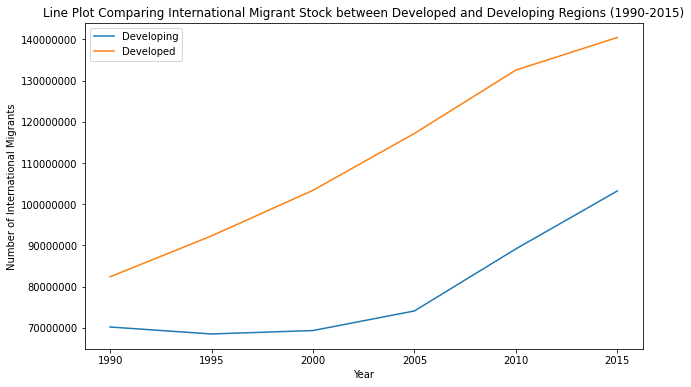

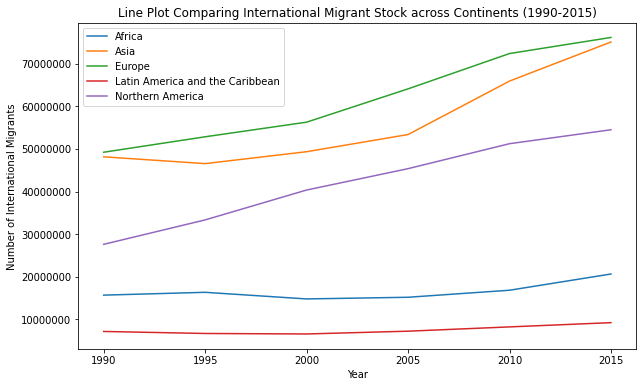

In [ ]:
#Creating line plot to compare international migration stock between Developed and Developing Regions 

f, ax = plt.subplots(1, 1, figsize=(10,6))

#Line plot to show Developed vs Developing 
plt.rcParams['figure.figsize'] = 10,6
plt.plot(Developing, label="Developing")
plt.plot(Developed, label="Developed")
plt.legend()
plt.title("Line Plot Comparing International Migrant Stock between Developed and Developing Regions (1990-2015)")
plt.xlabel("Year")
plt.ylabel("Number of International Migrants")
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

#Line plot to show all Continents 

plt.rcParams['figure.figsize'] = 10,6
plt.plot(Africa, label="Africa")
plt.plot(Asia, label="Asia")
plt.plot(Europe, label="Europe")
plt.plot(Latin, label="Latin America and the Caribbean")
plt.plot(Northern, label="Northern America")

plt.legend()
plt.title("Line Plot Comparing International Migrant Stock across Continents (1990-2015)")
plt.xlabel("Year")
plt.ylabel("Number of International Migrants")

plt.ticklabel_format(useOffset=False, style='plain')

f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()

**Data Cleaning for Table 2**: Total population at mid-year by sex and by major location

In [ ]:
#TABLE 2

#Create dataframe and load only second excel sheet named 'Table 2'
#skip UN logo/banner 

df2 = pd.read_excel(r'/content/gdrive/My Drive/UN_MigrantStockTotal_2015.xlsx',
                       sheet_name='Table 2',
                       skiprows=14) 

In [ ]:
#Dropping unnecessary columns in dataframe 

to_drop = ['Notes',
           'Country code',
           'Sort\norder']  

df2.drop(to_drop, inplace=True, axis=1)

In [ ]:
#Renaming 'nan' values to temporary column

df2.columns = df2.columns = ['Location', 'BothSexes1990', 'BothSexes1995', 
                   'BothSexes2000', 'BothSexes2005', 'BothSexes2010',
                   'BothSexes2015','Male1990', 'Male1995', 'Male2000', 'Male2005', 
                   'Male2010', 'Male2015','Female1990', 'Female1995','Female2000', 
                   'Female2005', 'Female2010', 'Female2015']

In [ ]:
#Remove first row now that we have temporarily changed column names 
df2 = df2.iloc[1:]

In [ ]:
#Reset index 
df2 = df2.reset_index(drop = True)

In [ ]:
#Create a new tidy dataframe where each variable has its own column

df2_new = pd.DataFrame(columns = ['Location', 'Year', 'Both Sexes', 'Male', 'Female'])
df2_new.head()

,Location,Year,Both Sexes,Male,Female


In [ ]:
#Using iterrows() to loop over rows in original dataframe

for i, r in df2.iterrows():
  df2_new = df2_new.append({'Location':r['Location'], 'Year':1990, 'Both Sexes':r['BothSexes1990'], 'Male':r['Male1990'], 'Female':r['Female1990']}, ignore_index=True)
  df2_new = df2_new.append({'Location':r['Location'], 'Year':1995, 'Both Sexes':r['BothSexes1995'], 'Male':r['Male1995'], 'Female':r['Female1995']}, ignore_index=True)
  df2_new = df2_new.append({'Location':r['Location'], 'Year':2000, 'Both Sexes':r['BothSexes2000'], 'Male':r['Male2000'], 'Female':r['Female2000']}, ignore_index=True)
  df2_new = df2_new.append({'Location':r['Location'], 'Year':2005, 'Both Sexes':r['BothSexes2005'], 'Male':r['Male2005'], 'Female':r['Female2005']}, ignore_index=True)
  df2_new = df2_new.append({'Location':r['Location'], 'Year':2010, 'Both Sexes':r['BothSexes2010'], 'Male':r['Male2010'], 'Female':r['Female2010']}, ignore_index=True)
  df2_new = df2_new.append({'Location':r['Location'], 'Year':2015, 'Both Sexes':r['BothSexes2015'], 'Male':r['Male2015'], 'Female':r['Female2015']}, ignore_index=True)

In [ ]:
#Set index to 'Location' and 'Year' 
df2_new = df2_new.set_index(['Location', 'Year'])

In [ ]:
#View 'Table 1' tidy dataframe
df2_new.head(30)

Both Sexes  \
Location                                           Year                
WORLD                                              1990  5309667.699   
                                                   1995  5735123.084   
                                                   2000  6126622.121   
                                                   2005  6519635.850   
                                                   2010  6929725.043   
                                                   2015  7349472.099   
Developed regions                                  1990  1144463.062   
                                                   1995  1169761.211   
                                                   2000  1188811.731   
                                                   2005  1208919.509   
                                                   2010  1233375.711   
                                                   2015  1251351.086   
Developing regions                                 1990  4165204.637   
                                                   1995  4565361.873   
                                                   2000  4937810.390   
                                                   2005  5310716.341   
                                                   2010  5696349.332   
                                                   2015  6098121.013   
Least developed countries                          1990   510057.629   
                                                   1995   585189.354   
                                                   2000   664386.087   
                                                   2005   752804.951   
                                                   2010   847254.847   
                                                   2015   954157.804   
Less developed regions excluding least develope... 1990  3655147.008   
                                                   1995  3980172.519   
                                                   2000  4273424.303   
                                                   2005  4557911.390   
                                                   2010  4849094.485   
                                                   2015  5143963.209   

                                                                Male  \
Location                                           Year                
WORLD                                              1990  2670423.701   
                                                   1995  2886635.893   
                                                   2000  3084537.662   
                                                   2005  3285082.249   
                                                   2010  3493956.904   
                                                   2015  3707205.753   
Developed regions                                  1990   555255.626   
                                                   1995   568268.456   
                                                   2000   578010.218   
                                                   2005   587962.213   
                                                   2010   599955.476   
                                                   2015   609297.148   
Developing regions                                 1990  2115168.075   
                                                   1995  2318367.437   
                                                   2000  2506527.444   
                                                   2005  2697120.036   
                                                   2010  2894001.428   
                                                   2015  3097908.605   
Least developed countries                          1990   254042.556   
                                                   1995   292026.742   
                                                   2000   331482.475   
                                                   2005   375757.715   
                         

**Data Visualization for Table 2**: Total population at mid-year by sex and by major location

In [ ]:
#Create new dataframe with 3 countries in South America and only include 'Both Sexes' column
#APC stands for Argentina, Peru, Colombia

APC = df2_new.loc[['Argentina', 'Colombia', 'Peru']]

top_drop = ['Male', 
            'Female']

APC.drop(top_drop, inplace=True, axis=1)
APC_reset = APC.reset_index()

#Reset index because multi-index makes it difficult to plot
APC_reset = APC_reset.rename(columns={'Both Sexes': 'Population'})
APC_reset

,Location,Year,Population
0,Argentina,1990,32729.740
1,Argentina,1995,34994.818
2,Argentina,2000,37057.453
3,Argentina,2005,39145.491
4,Argentina,2010,41222.875
5,Argentina,2015,43416.755
6,Colombia,1990,34271.563
7,Colombia,1995,37441.980
8,Colombia,2000,40403.959
9,Colombia,2005,43285.636


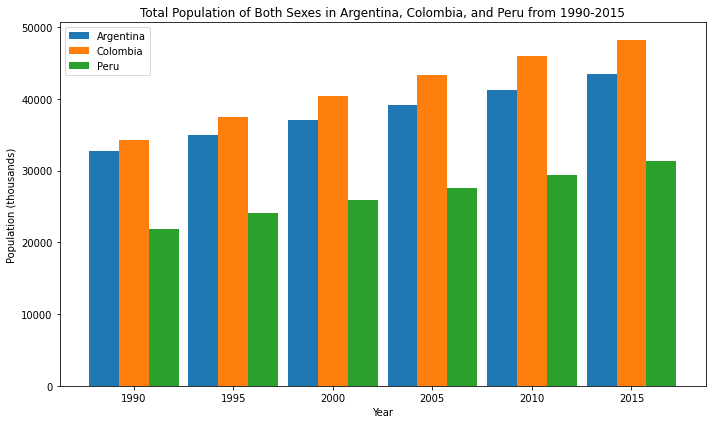

In [ ]:
#Bar graph

####Ran into a lot of errors making grouped bar graphs and I tried my best to troubleshoot but it did not work so I had to create x and y variables and write in each value####

#x-axis
Year = [1990, 1995, 2000, 2005, 2010, 2015]

#y-axis 
Argentina_Population = [32729.740,34994.818,37057.453,39145.491,41222.875,43416.755]
Colombia_Population = [34271.563,37441.980,40403.959,43285.636,45918.101,48228.704]
Peru_Population = [21826.658,24038.761,25914.875,27610.406,29373.644,31376.670]

#bar properties 
x = np.arange(len(Year))
width = 0.3

#bar elements 
fig, ax = plt.subplots()
bar1 = ax.bar(x - width, Argentina_Population, width, label='Argentina')
bar2 = ax.bar(x, Colombia_Population, width, label='Colombia')
bar3 = ax.bar(x + width, Peru_Population, width, label='Peru')

ax.set_ylabel('Population (thousands)')
ax.set_xlabel('Year')
ax.set_title('Total Population of Both Sexes in Argentina, Colombia, and Peru from 1990-2015')

ax.set_xticklabels([0,1990, 1995, 2000, 2005, 2010, 2015])
ax.legend()
 
fig.tight_layout()
 
plt.show()



In [ ]:
#Create new dataframe with 3 countries in Asia, Europe, and Africa 
#JSM stands for Japan, Sweden, and Morocco 


JSM = df2_new.loc[['Japan', 'Sweden', 'Morocco']]

#Only focusing on 'both sexes'
top_drop = ['Male', 
            'Female']

JSM.drop(top_drop, inplace=True, axis=1)

#Reset index because multi-index makes it difficult to plot

JSM = JSM.reset_index()
JSM = JSM.rename(columns={'Both Sexes': 'Population'})
JSM


,Location,Year,Population
0,Japan,1990,122249.285
1,Japan,1995,124483.305
2,Japan,2000,125714.674
3,Japan,2005,126978.754
4,Japan,2010,127319.802
5,Japan,2015,126573.481
6,Sweden,1990,8559.107
7,Sweden,1995,8826.720
8,Sweden,2000,8872.284
9,Sweden,2005,9030.163


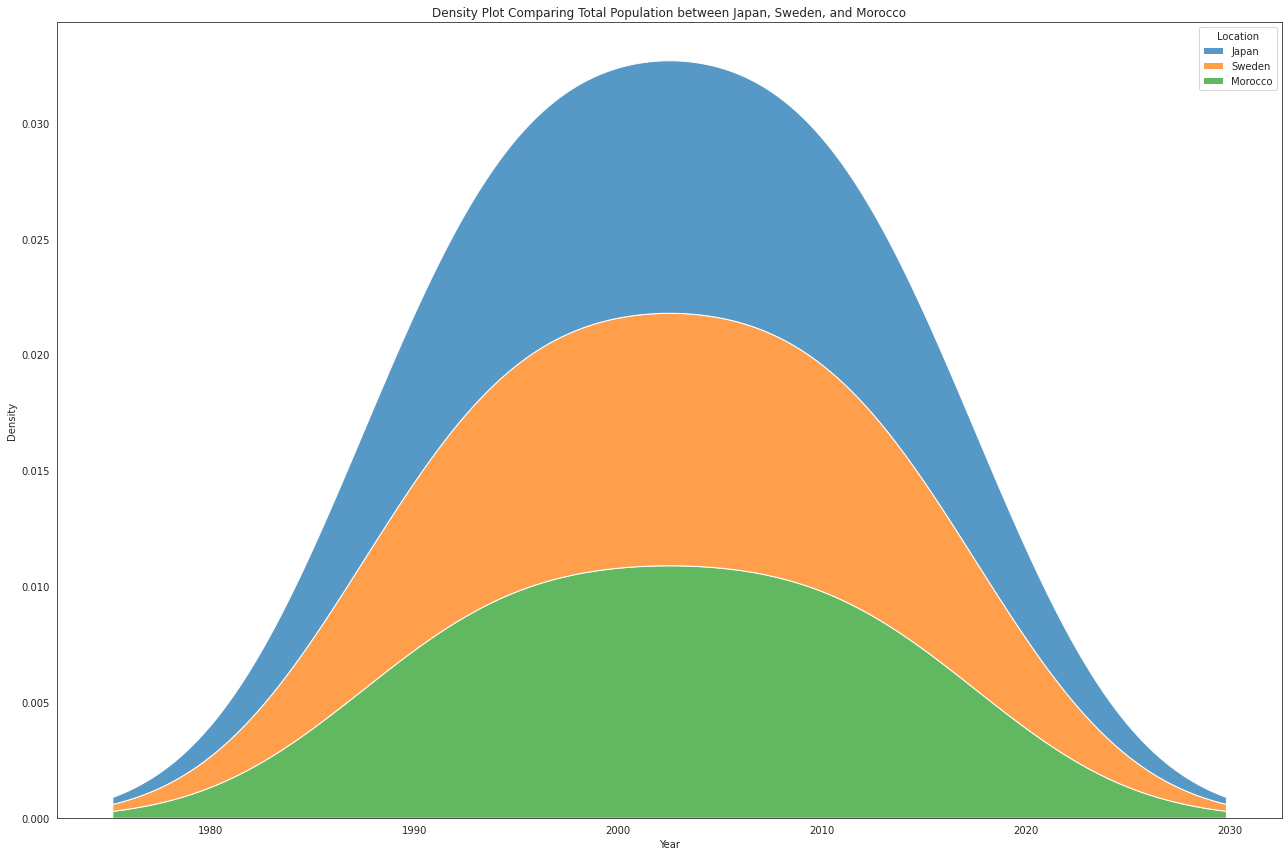

In [ ]:
sns.set_style('white')

#Kernel Density Plot 
f, axs = plt.subplots(1, 1, figsize=(18, 12))

sns.kdeplot(data=JSM, x="Year", hue="Location", multiple="stack").set(title='Density Plot Comparing Total Population between Japan, Sweden, and Morocco')

f.tight_layout()

plt.grid(False)
plt.show()

**Data Cleaning for Table 3**: International migrant stock as a percentage of the total population by sex and major area





In [ ]:
#Table 3 

#Create dataframe and load only second excel sheet named 'Table 2'
#skip UN logo/banner 

df3 = pd.read_excel(r'/content/gdrive/My Drive/UN_MigrantStockTotal_2015.xlsx',
                       sheet_name='Table 3',
                       skiprows=14) 

In [ ]:
#Dropping unnecessary columns in dataframe 

to_drop = ['Notes',
           'Country code',
           'Sort\norder',
           'Type of data (a)']  

df3.drop(to_drop, inplace=True, axis=1)

In [ ]:
#Renaming columns 

df3.columns = df3.columns = ['Location', 'BothSexes1990', 'BothSexes1995', 
                   'BothSexes2000', 'BothSexes2005', 'BothSexes2010', 
                   'BothSexes2015','Male1990', 'Male1995', 'Male2000', 'Male2005', 
                   'Male2010', 'Male2015','Female1990', 'Female1995','Female2000', 
                   'Female2005', 'Female2010', 'Female2015']

In [ ]:
#Remove first row now that we have temporarily changed column names 
df3 = df3.iloc[1:]

In [ ]:
#Reset index 
df3 = df3.reset_index(drop = True)
df3.head()

,Location,BothSexes1990,BothSexes1995,BothSexes2000,BothSexes2005,BothSexes2010,BothSexes2015,Male1990,Male1995,Male2000,Male2005,Male2010,Male2015,Female1990,Female1995,Female2000,Female2005,Female2010,Female2015
0,WORLD,2.87331,2.803806,2.818899,2.933739,3.199467,3.315888,2.91143,2.831583,2.849206,2.979124,3.280341,3.4019,2.83474,2.775658,2.788169,2.887645,3.117222,3.228342
1,Developed regions,7.198015,7.891085,8.695688,9.693045,10.747765,11.226422,7.251326,7.935123,8.743236,9.73154,10.680972,11.097807,7.147777,7.84948,8.650694,9.656595,10.811029,11.348476
2,Developing regions,1.685021,1.500317,1.404022,1.395066,1.565106,1.692624,1.772158,1.580624,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.49061
3,Least developed countries,2.171513,2.001353,1.516863,1.303078,1.182422,1.252551,2.30005,2.103476,1.617552,1.432574,1.293264,1.35773,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
4,Less developed regions excluding least develop...,1.617042,1.426534,1.386338,1.410133,1.631865,1.774158,1.700101,1.505273,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [ ]:
#Create a new tidy dataframe where each variable has its own column

df3_new = pd.DataFrame(columns = ['Location', 'Year', 'Both Sexes', 'Male', 'Female'])
df3_new.head()

,Location,Year,Both Sexes,Male,Female


In [ ]:
#Using iterrows() to loop over rows in original dataframe

for i, r in df3.iterrows():
  df3_new = df3_new.append({'Location':r['Location'], 'Year':1990, 'Both Sexes':r['BothSexes1990'], 'Male':r['Male1990'], 'Female':r['Female1990']}, ignore_index=True)
  df3_new = df3_new.append({'Location':r['Location'], 'Year':1995, 'Both Sexes':r['BothSexes1995'], 'Male':r['Male1995'], 'Female':r['Female1995']}, ignore_index=True)
  df3_new = df3_new.append({'Location':r['Location'], 'Year':2000, 'Both Sexes':r['BothSexes2000'], 'Male':r['Male2000'], 'Female':r['Female2000']}, ignore_index=True)
  df3_new = df3_new.append({'Location':r['Location'], 'Year':2005, 'Both Sexes':r['BothSexes2005'], 'Male':r['Male2005'], 'Female':r['Female2005']}, ignore_index=True)
  df3_new = df3_new.append({'Location':r['Location'], 'Year':2010, 'Both Sexes':r['BothSexes2010'], 'Male':r['Male2010'], 'Female':r['Female2010']}, ignore_index=True)
  df3_new = df3_new.append({'Location':r['Location'], 'Year':2015, 'Both Sexes':r['BothSexes2015'], 'Male':r['Male2015'], 'Female':r['Female2015']}, ignore_index=True)

In [ ]:
#Set index to 'Location' and 'Year' 
df3_new = df3_new.set_index(['Location', 'Year'])

In [ ]:
#Replace empty string with nan 

df3_new = df3_new.apply(lambda x: x.str.strip() if isinstance (x, str) else x).replace('..', np.nan)
print(df3_new)

                                Both Sexes      Male    Female
Location                  Year                                
WORLD                     1990    2.873310  2.911430  2.834740
                          1995    2.803806  2.831583  2.775658
                          2000    2.818899  2.849206  2.788169
                          2005    2.933739  2.979124  2.887645
                          2010    3.199467  3.280341  3.117222
...                                    ...       ...       ...
Wallis and Futuna Islands 1995   11.878668       NaN       NaN
                          2000   13.899427       NaN       NaN
                          2005   16.601151       NaN       NaN
                          2010   20.464431       NaN       NaN
                          2015   21.663752       NaN       NaN

[1590 rows x 3 columns]


In [ ]:
#View 'Table 3' tidy dataframe 
df3_new.head(30)

Both Sexes  \
Location                                           Year               
WORLD                                              1990    2.873310   
                                                   1995    2.803806   
                                                   2000    2.818899   
                                                   2005    2.933739   
                                                   2010    3.199467   
                                                   2015    3.315888   
Developed regions                                  1990    7.198015   
                                                   1995    7.891085   
                                                   2000    8.695688   
                                                   2005    9.693045   
                                                   2010   10.747765   
                                                   2015   11.226422   
Developing regions                                 1990    1.685021   
                                                   1995    1.500317   
                                                   2000    1.404022   
                                                   2005    1.395066   
                                                   2010    1.565106   
                                                   2015    1.692624   
Least developed countries                          1990    2.171513   
                                                   1995    2.001353   
                                                   2000    1.516863   
                                                   2005    1.303078   
                                                   2010    1.182422   
                                                   2015    1.252551   
Less developed regions excluding least develope... 1990    1.617042   
                                                   1995    1.426534   
                                                   2000    1.386338   
                                                   2005    1.410133   
                                                   2010    1.631865   
                                                   2015    1.774158   

                                                              Male     Female  
Location                                           Year                        
WORLD                                              1990   2.911430   2.834740  
                                                   1995   2.831583   2.775658  
                                                   2000   2.849206   2.788169  
                                                   2005   2.979124   2.887645  
                                                   2010   3.280341   3.117222  
                                                   2015   3.401900   3.228342  
Developed regions                                  1990   7.251326   7.147777  
                                                   1995   7.935123   7.849480  
                                                   2000   8.743236   8.650694  
                                                   2005   9.731540   9.656595  
                                                   2010  10.680972  10.811029  
                                                   2015  11.097807  11.348476  
Developing regions                                 1990   1.772158   1.595116  
                                                   1995   1.580624   1.417459  
                                                   2000   1.490031   1.315351  
                                                   2005   1.507122   1.279428  
                                                   2010   1.746117   1.378176  
                                                   2015   1.888268   1.490610  
Least developed countries                          1990   2.300050   2.045276  
                                                   1995   2.103476   1.901226  
                        

**Data Visualization for Table 3**: International migrant stock as a percentage of the total population by sex and major area

In [ ]:
#Creating another bar graph for the same 3 countries in South America to compare migrant percentage of the total population 

APC2 = df3_new.loc[['Argentina', 'Colombia', 'Peru']]

top_drop = ['Male', 
            'Female']

APC2.drop(top_drop, inplace=True, axis=1)
APC2

Both Sexes
Location  Year            
Argentina 1990    5.041039
          1995    4.558015
          2000    4.156300
          2005    4.274025
          2010    4.380958
          2015    4.805292
Colombia  1990    0.304267
          1995    0.285623
          2000    0.271283
          2005    0.248609
          2010    0.270636
          2015    0.276047
Peru      1990    0.297916
          1995    0.236002
          2000    0.255811
          2005    0.280840
          2010    0.286195
          2015    0.289645

In [ ]:
#Reset index 
APC2 = APC2.reset_index()

In [ ]:
#Reset index because multi-index makes it difficult to plot
APC2_new = APC2.rename(columns={'Both Sexes': 'International Migrant Population (%)'})
APC2_new

,Location,Year,International Migrant Population (%)
0,Argentina,1990,5.041039
1,Argentina,1995,4.558015
2,Argentina,2000,4.156300
3,Argentina,2005,4.274025
4,Argentina,2010,4.380958
5,Argentina,2015,4.805292
6,Colombia,1990,0.304267
7,Colombia,1995,0.285623
8,Colombia,2000,0.271283
9,Colombia,2005,0.248609


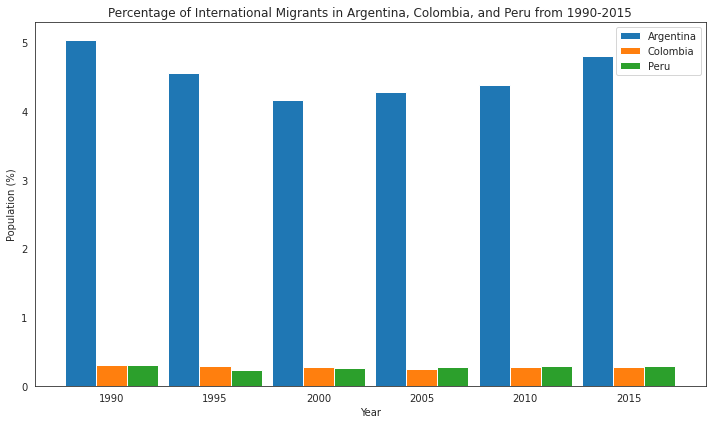

In [ ]:
#Bar graph


#x-axis
Year = [1990, 1995, 2000, 2005, 2010, 2015]

#y-axis 
df3_Argentina_Population = [5.041039,4.558015,4.156300,4.274025,4.380958,4.805292]
df3_Colombia_Population = [0.304267,0.285623,0.271283,0.248609,0.270636,0.276047]
df3_Peru_Population = [0.297916,0.236002,0.255811,0.280840,0.286195,0.289645]

#bar properties 
x = np.arange(len(Year))
width = 0.3

#bar elements 
fig, ax = plt.subplots()
bar1 = ax.bar(x - width, df3_Argentina_Population, width, label='Argentina')
bar2 = ax.bar(x, df3_Colombia_Population, width, label='Colombia')
bar3 = ax.bar(x + width, df3_Peru_Population, width, label='Peru')

ax.set_ylabel('Population (%)')
ax.set_xlabel('Year')
ax.set_title('Percentage of International Migrants in Argentina, Colombia, and Peru from 1990-2015')

ax.set_xticklabels([0,1990, 1995, 2000, 2005, 2010, 2015])
ax.legend()
plt.ticklabel_format(style='plain', axis='y')

 
fig.tight_layout()
 
plt.show()

In [ ]:
#Creating a boxplot plot to visualize the percentage of male and female international migrants in China 

China = df3_new.loc['China']
China 

,Both Sexes,Male,Female
Year,,,
1990,0.032596,0.032397,0.032807
1995,0.036014,0.035368,0.036696
2000,0.040003,0.038947,0.041119
2005,0.052003,0.056585,0.047151
2010,0.063377,0.073271,0.052881
2015,0.071076,0.084648,0.056652


In [ ]:
#Understand descriptive statistics 

China.describe()

,Both Sexes,Male,Female
count,6.000000,6.000000,6.000000
mean,0.049178,0.053536,0.044551
std,0.015630,0.021709,0.009316
min,0.032596,0.032397,0.032807
25%,0.037012,0.036263,0.037802
50%,0.046003,0.047766,0.044135
75%,0.060533,0.069100,0.051448
max,0.071076,0.084648,0.056652


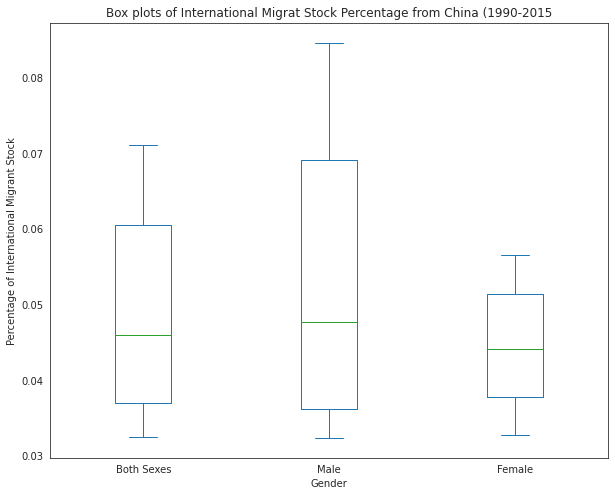

In [ ]:
#Boxplot 

China.plot(kind='box', figsize=(10,8))

plt.title('Box plots of International Migrat Stock Percentage from China (1990-2015')
plt.xlabel('Gender')
plt.ylabel('Percentage of International Migrant Stock')

plt.show()

**Data Cleaning for Table 4**: Female migrants as a percentage of the international migrant stock 

In [ ]:
#Table 4

#Create dataframe and load only second excel sheet named 'Table 2'
#skip UN logo/banner 

df4 = pd.read_excel(r'/content/gdrive/My Drive/UN_MigrantStockTotal_2015.xlsx',
                       sheet_name='Table 4',
                       skiprows=14) 

In [ ]:
#Dropping unnecessary columns in dataframe 

to_drop = ['Notes',
           'Country code',
           'Sort\norder',
           'Type of data (a)']  

df4.drop(to_drop, inplace=True, axis=1)

In [ ]:
#Renaming columns 

df4.columns = df4.columns = ['Location', 'Female1990', 'Female1995', 'Female2000', 
                   'Female2005', 'Female2010', 'Female2015']

In [ ]:
#Remove first row now that we have temporarily changed column names 
df4 = df4.iloc[1:]

In [ ]:
#Reset index 
df4 = df4.reset_index(drop = True)
df4.head()

,Location,Female1990,Female1995,Female2000,Female2005,Female2010,Female2015
0,WORLD,49.03915,49.16879,49.112244,48.832993,48.305660,48.249769
1,Developed regions,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
2,Developing regions,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
3,Least developed countries,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
4,Less developed regions excluding least develop...,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [ ]:
#Create a new tidy dataframe where each variable has its own column

df4_new = pd.DataFrame(columns = ['Location', 'Year', 'Female'])
df4_new.head()

,Location,Year,Female


In [ ]:
for i, r in df4.iterrows():
  df4_new = df4_new.append({'Location':r['Location'], 'Year':1990, 'Female':r['Female1990']}, ignore_index=True)
  df4_new = df4_new.append({'Location':r['Location'], 'Year':1995, 'Female':r['Female1995']}, ignore_index=True)
  df4_new = df4_new.append({'Location':r['Location'], 'Year':2000, 'Female':r['Female2000']}, ignore_index=True)
  df4_new = df4_new.append({'Location':r['Location'], 'Year':2005, 'Female':r['Female2005']}, ignore_index=True)
  df4_new = df4_new.append({'Location':r['Location'], 'Year':2010, 'Female':r['Female2010']}, ignore_index=True)
  df4_new = df4_new.append({'Location':r['Location'], 'Year':2015, 'Female':r['Female2015']}, ignore_index=True)

In [ ]:
#Set index to 'Location' and 'Year' 
df4_new = df4_new.set_index(['Location', 'Year'])

In [ ]:
#Replace empty string with nan 

df4_new = df4_new.apply(lambda x: x.str.strip() if isinstance (x, str) else x).replace('..', np.nan)
print(df4_new)

                                   Female
Location                  Year           
WORLD                     1990  49.039150
                          1995  49.168790
                          2000  49.112244
                          2005  48.832993
                          2010  48.305660
...                                   ...
Wallis and Futuna Islands 1995  48.869048
                          2000  49.478908
                          2005  49.513742
                          2010  49.531700
                          2015  49.526150

[1590 rows x 1 columns]


In [ ]:
#View 'Table 4' tidy dataframe 
df4_new.head(30)

Female
Location                                           Year           
WORLD                                              1990  49.039150
                                                   1995  49.168790
                                                   2000  49.112244
                                                   2005  48.832993
                                                   2010  48.305660
                                                   2015  48.249769
Developed regions                                  1990  51.123977
                                                   1995  51.149024
                                                   2000  51.113307
                                                   2005  51.171501
                                                   2010  51.658932
                                                   2015  51.866687
Developing regions                                 1990  46.592099
                                                   1995  46.500135
                                                   2000  46.128444
                                                   2005  45.134297
                                                   2010  43.319780
                                                   2015  43.327078
Least developed countries                          1990  47.261155
                                                   1995  47.571664
                                                   2000  46.826689
                                                   2005  45.157406
                                                   2010  45.499573
                                                   2015  45.942752
Less developed regions excluding least develope... 1990  46.466684
                                                   1995  46.279022
                                                   2000  46.009598
                                                   2005  45.130768
                                                   2010  43.043672
                                                   2015  42.984398

**Data Visualization for Table 4:** Female migrants as a percentage of the international migrant stock

In [ ]:
#Creating dataframe to represent percentage of female migrant in total population for both Turkey and Uganda 

#Create dataframes for each country 
Turkey = df4_new.loc['Turkey']
Uganda = df4_new.loc['Uganda']

#Reset index 
Turkey = Turkey.reset_index()
Uganda = Uganda.reset_index()
Turkey

,Year,Female
0,1990,50.387905
1,1995,51.163362
2,2000,51.910633
3,2005,53.083603
4,2010,54.210356
5,2015,48.920374


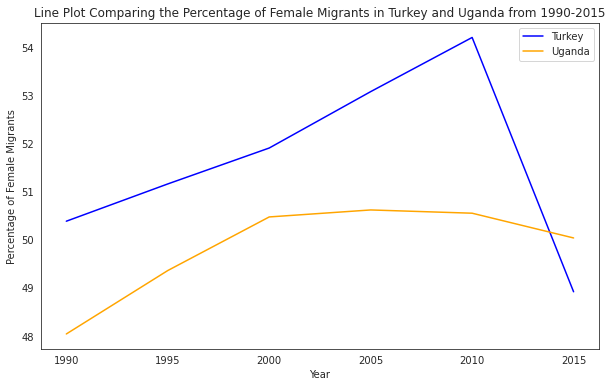

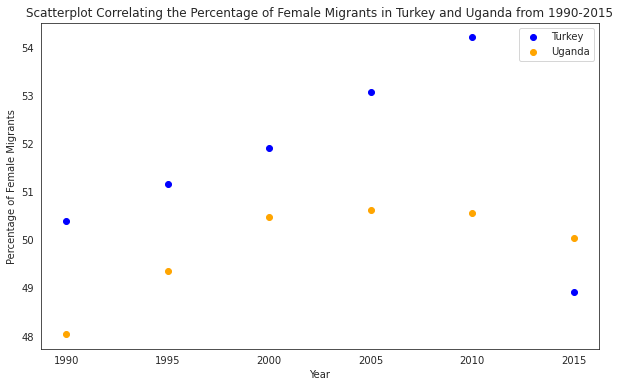

In [ ]:
#Using line graph to compare the percentage of female figrants in Turkey and Uganda from 1990-2015

f, ax = plt.subplots(1, 1, figsize=(10,6))

#Line graph

x3 = Turkey['Year']
y3 = Turkey['Female']

x4 = Uganda['Year']
y4 = Uganda['Female']

plt.rcParams['figure.figsize'] = 10,6
plt.plot(x3, y3,color='blue', label="Turkey")
plt.plot(x4, y4, color='orange', label="Uganda") 

plt.legend()
plt.title("Line Plot Comparing the Percentage of Female Migrants in Turkey and Uganda from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Percentage of Female Migrants")
plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

#Scatterplot 

x = Turkey['Year']
y = Turkey['Female']

x1 = Uganda['Year']
y1 = Uganda['Female']
plt.scatter(x,y, color='blue')
plt.scatter(x1,y1, color='orange')
plt.title("Scatterplot Correlating the Percentage of Female Migrants in Turkey and Uganda from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Percentage of Female Migrants")
labels = ['Turkey', 'Uganda']
plt.legend(labels)


f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()